# Importing the Dependenices

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('country_vaccinations.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1676 non-null   object 
 1   iso_code                             1491 non-null   object 
 2   date                                 1676 non-null   object 
 3   total_vaccinations                   1105 non-null   float64
 4   people_vaccinated                    842 non-null    float64
 5   people_fully_vaccinated              416 non-null    float64
 6   daily_vaccinations_raw               891 non-null    float64
 7   daily_vaccinations                   1604 non-null   float64
 8   total_vaccinations_per_hundred       1105 non-null   float64
 9   people_vaccinated_per_hundred        842 non-null    float64
 10  people_fully_vaccinated_per_hundred  416 non-null    float64
 11  daily_vaccinations_per_million

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


# Cleaning The Data
Cleaning the ISO code of The NaN Country

In [4]:
data[data['iso_code'].isnull()]['country'].value_counts()

Northern Ireland    46
Wales               46
Scotland            45
England             39
Northern Cyprus      9
Name: country, dtype: int64

In [5]:
# all these country have ISO code as GBR -- google
# now setting all the NaN values of ISO code as GBR 
# we can also use 'inplace' arugument if we want to change the data columns directly.
new_iso = data['iso_code'].fillna("GBR")
data['new_iso_code'] = new_iso
data.drop(columns = 'iso_code', axis = 1)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,new_iso_code
0,Argentina,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,ARG
1,Argentina,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,ARG
2,Argentina,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,ARG
3,Argentina,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,ARG
4,Argentina,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,Wales,2021-01-23,265054.0,264538.0,516.0,24038.0,17371.0,8.41,8.39,0.02,5510.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,GBR
1672,Wales,2021-01-24,271376.0,270833.0,543.0,6322.0,17063.0,8.61,8.59,0.02,5412.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,GBR
1673,Wales,2021-01-25,290147.0,289566.0,581.0,18771.0,18279.0,9.20,9.18,0.02,5798.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,GBR
1674,Wales,2021-01-26,312944.0,312305.0,639.0,22797.0,19537.0,9.93,9.91,0.02,6197.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,GBR


#### Fixing all the NaN values in Other columns by taking their mean.

In [6]:
data.mean()

total_vaccinations                     751452.169231
people_vaccinated                      747129.939430
people_fully_vaccinated                165813.584135
daily_vaccinations_raw                  53809.852974
daily_vaccinations                      47922.092269
total_vaccinations_per_hundred              3.129493
people_vaccinated_per_hundred               3.285238
people_fully_vaccinated_per_hundred         0.681851
daily_vaccinations_per_million           1675.870948
dtype: float64

In [7]:
data.fillna(data.mean(), inplace = True)
data.info()
# all the NaN values have been filled with their means now.
# all the data cleaning process has been done let's do the Exploratory Data Analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1676 non-null   object 
 1   iso_code                             1491 non-null   object 
 2   date                                 1676 non-null   object 
 3   total_vaccinations                   1676 non-null   float64
 4   people_vaccinated                    1676 non-null   float64
 5   people_fully_vaccinated              1676 non-null   float64
 6   daily_vaccinations_raw               1676 non-null   float64
 7   daily_vaccinations                   1676 non-null   float64
 8   total_vaccinations_per_hundred       1676 non-null   float64
 9   people_vaccinated_per_hundred        1676 non-null   float64
 10  people_fully_vaccinated_per_hundred  1676 non-null   float64
 11  daily_vaccinations_per_million

# Exploratory Data Analysis

### First we are going to Check which Type of Vaccine has been used in World and its Proportion.

In [8]:
# for this we need columns like country, vaccines, total_vaccinations, ISO Code
vaccine_proportions = data['vaccines'].value_counts() / 100
vaccine_proportions

Pfizer/BioNTech                          8.28
Moderna, Pfizer/BioNTech                 3.66
Oxford/AstraZeneca, Pfizer/BioNTech      2.15
Sputnik V                                0.61
Pfizer/BioNTech, Sinopharm               0.53
Sinovac                                  0.46
CNBG, Sinovac                            0.44
Pfizer/BioNTech, Sinopharm, Sputnik V    0.20
Covishield, Sinopharm                    0.19
Covaxin, Covishield                      0.13
Pfizer/BioNTech, Sinovac                 0.09
Covishield                               0.02
Name: vaccines, dtype: float64

<ipython-input-9-3d60518ea687>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


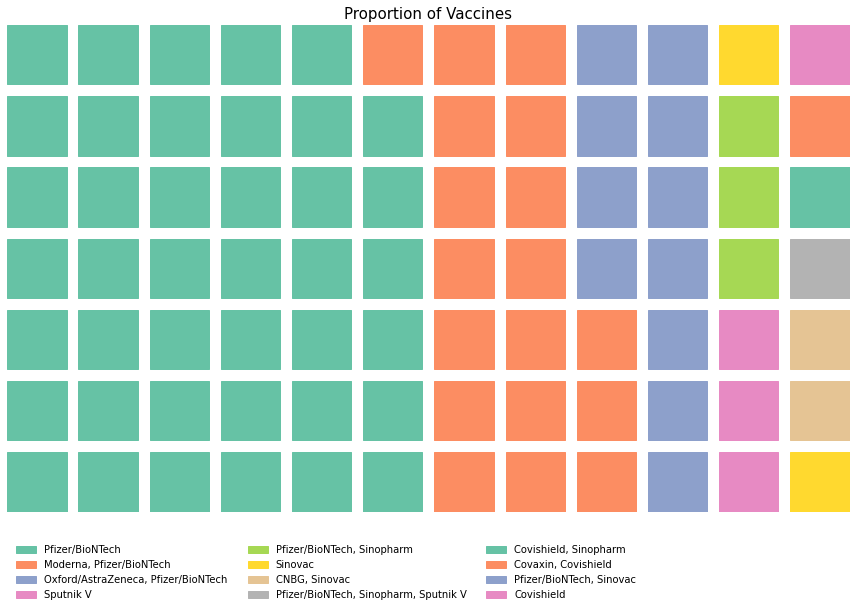

In [9]:
from pywaffle import Waffle
vaccine_names = ['Pfizer/BioNTech', 'Moderna, Pfizer/BioNTech', 'Oxford/AstraZeneca, Pfizer/BioNTech', 'Sputnik V',
                 'Pfizer/BioNTech, Sinopharm', 'Sinovac', 'CNBG, Sinovac', 'Pfizer/BioNTech, Sinopharm, Sputnik V',
                 'Covishield, Sinopharm', 'Covaxin, Covishield', 'Pfizer/BioNTech, Sinovac', 'Covishield']
fig = plt.figure(
    rows = 7,
    columns = 12,
    FigureClass = Waffle,
    values = vaccine_proportions,
    title = {'label': 'Proportion of Vaccines', 'loc': 'center',
          'fontsize':15},
    labels = vaccine_names,
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 'ncol': 3, 'framealpha': 0},
    
    figsize = (12,9)
)
fig.show()


From this we know that Pfizer / BioNTech vaccine are mostly used in world.

### Now let's Check the Progress of Vaccination in India

In [10]:
# for this we need all the data regarding India from main data.
IND = data[data['new_iso_code'] == 'IND']
IND
# now we have all the data from India in 'IND' dataframe.

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,new_iso_code
690,India,IND,2021-01-15,0.0,747129.93943,165813.584135,53809.852974,47922.092269,0.00,3.285238,0.681851,1675.870948,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND
691,India,IND,2021-01-16,191181.0,747129.93943,165813.584135,191181.000000,191181.000000,0.01,3.285238,0.681851,139.000000,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND
692,India,IND,2021-01-17,224301.0,747129.93943,165813.584135,33120.000000,112150.000000,0.02,3.285238,0.681851,81.000000,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND
693,India,IND,2021-01-18,454049.0,747129.93943,165813.584135,229748.000000,151350.000000,0.03,3.285238,0.681851,110.000000,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND
694,India,IND,2021-01-19,674835.0,747129.93943,165813.584135,220786.000000,168709.000000,0.05,3.285238,0.681851,122.000000,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND
695,India,IND,2021-01-20,806484.0,747129.93943,165813.584135,131649.000000,161297.000000,0.06,3.285238,0.681851,117.000000,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND
696,India,IND,2021-01-21,1043534.0,747129.93943,165813.584135,237050.000000,173922.000000,0.08,3.285238,0.681851,126.000000,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND
697,India,IND,2021-01-22,1390592.0,747129.93943,165813.584135,347058.000000,198656.000000,0.10,3.285238,0.681851,144.000000,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND
698,India,IND,2021-01-23,1582201.0,747129.93943,165813.584135,191609.000000,198717.000000,0.11,3.285238,0.681851,144.000000,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND
699,India,IND,2021-01-24,1615504.0,747129.93943,165813.584135,33303.000000,198743.000000,0.12,3.285238,0.681851,144.000000,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/,IND


### Here we are going to show the progress of India Vaccinations

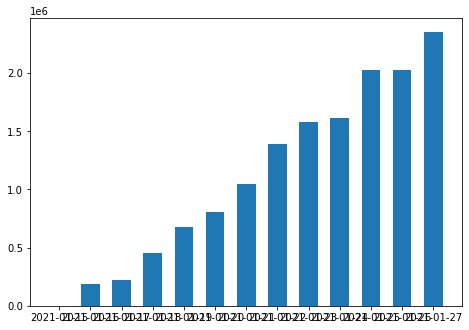

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(IND['date'],IND['total_vaccinations'], width = 0.6)
plt.show()

### We will use plotly module to show the progress of vaccination in comaprison with rest of World

In [14]:
fig = px.choropleth(data,
                   locations='iso_code',
                   color='total_vaccinations',
                   hover_name='country',
                   projection='natural earth',
                   animation_frame='date',
                   color_continuous_scale = 'ylgnbu',
                   range_color=[0,10000000])

fig.show()
write_html(fig)

NameError: name 'write_html' is not defined

# India Vaccination Rate

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=IND.daily_vaccinations)
plt.ylabel("number of vaccination")
plt.xlabel("Date")
plt.title("India's Daily Vaccination Rate")
plt.show()